In [1]:
import os
os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')
from MHS.F_model_training import *
from math import radians, cos, sin, asin, sqrt
from vision.misc.help_func import go_up_n_levels

os.chdir(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter/MHS')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

/home/fruitspec-lab/anaconda3/envs/FsCounter/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
from vision.tools.jupyter_notebooks import notebook_analysis_help_funcs
import importlib
importlib.reload(notebook_analysis_help_funcs)
from vision.tools.jupyter_notebooks.notebook_analysis_help_funcs import *

In [3]:
master_folder = "/media/fruitspec-lab/cam175/Aq_Test"
row_lengths = run_on_folder(master_folder)
row_lengths

{'BEERAMUKA_Afternoon_R37_S1(200923)': 74.56352941983145,
 'BEERAMUKA_Afternoon_R38_S1(200923)': 71.05259167781745,
 'BEERAMUKA_Afternoon_R39_S1(200923)': 73.45805939958579,
 'BEERAMUKA_Afternoon_R40_S1(200923)': 72.77372801672789,
 'BEERAMUKA_Afternoon_R41_S1(200923)': 74.4066092438906,
 'BEERAMUKA_Afternoon_R42_S1(200923)': 73.60178396655657,
 'BEERAMUKA_Afternoon_R43_S1(200923)': 74.26750878110244,
 'BEERAMUKA_Afternoon_R44_S1(200923)': 71.18096143887246,
 'BEERAMUKA_Afternoon_R45_S1(200923)': 74.8091119593949,
 'BEERAMUKA_Afternoon_R46_S1(200923)': 72.48808001051074,
 'BEERAMUKA_Afternoon_R48_S1(200923)': 73.93895404867843,
 'BEERAMUKA_Afternoon_R49_S1(200923)': 71.09732839205199,
 'BEERAMUKA_Afternoon_R50_S1(200923)': 73.71459386982691,
 'BEERAMUKA_Afternoon_R52_S1(200923)': 65.27971284543345,
 'BEERAMUKA_Afternoon_R53_S1(200923)': 72.67170545940428,
 'BEERAMUKA_Afternoon_R54_S1(200923)': 73.20132328483884,
 'BEERAMUKA_Afternoon_R55_S1(200923)': 72.65281739451527,
 'BEERAMUKA_Afte

In [4]:
n_tracks = run_on_folder_tracks(master_folder, full_cv=True)
n_tracks

{'BEERAMUKA_Afternoon_R37_S1(200923)': (11259,
  7098,
  5219,
  4048,
  3142,
  38741,
  0),
 'BEERAMUKA_Afternoon_R38_S1(200923)': (13449,
  8208,
  6131,
  4826,
  3861,
  49722,
  0),
 'BEERAMUKA_Afternoon_R39_S1(200923)': (13165,
  7476,
  5206,
  3890,
  2975,
  40793,
  4.0),
 'BEERAMUKA_Afternoon_R40_S1(200923)': (11063,
  5821,
  3866,
  2707,
  2019,
  30088,
  0.0),
 'BEERAMUKA_Afternoon_R41_S1(200923)': (10774,
  6050,
  3941,
  2689,
  1854,
  28664,
  4.0),
 'BEERAMUKA_Afternoon_R42_S1(200923)': (10239,
  5118,
  3409,
  2449,
  1868,
  27872,
  0.0),
 'BEERAMUKA_Afternoon_R43_S1(200923)': (12999,
  7204,
  5003,
  3742,
  2869,
  40087,
  12.0),
 'BEERAMUKA_Afternoon_R44_S1(200923)': (13971,
  7735,
  5238,
  3782,
  2825,
  40902,
  0.0),
 'BEERAMUKA_Afternoon_R45_S1(200923)': (13103,
  7157,
  4925,
  3676,
  2817,
  40538,
  12.0),
 'BEERAMUKA_Afternoon_R46_S1(200923)': (8165,
  3764,
  2372,
  1625,
  1143,
  19470,
  0.0),
 'BEERAMUKA_Afternoon_R48_S1(200923)': (118

In [5]:
df_out = pd.DataFrame(n_tracks).T
df_out.columns = ["cv1", "cv2", "cv3", "cv4", "cv5", "n_dets", "n_dropped"]
df_out["row_len"] = df_out.index.map(row_lengths)
for i in range(1,4):
    df_out[f"cv{i}_per_meter"] = df_out[f"cv{i}"]/df_out["row_len"]
df_out.reset_index(names = "name", inplace = True)
df_out["block"] = df_out["name"].apply(lambda x: x.split("_")[0])
df_out["scan_time"] = df_out["name"].apply(lambda x: x.split("_")[1])
df_out["counter_row"] = df_out["name"].apply(lambda x: int(x.split("_")[2][1:]))
df_out["side"] = df_out["counter_row"].apply(lambda x: "A" if x%2 else "B")

## real row mapping

In [6]:
df_out["real_row"] = df_out["block"].apply(lambda x: 1 if x == "Or2009" else 2)  

## method used mapping

In [54]:
def get_method(row_number, real_row):
    if real_row == 2:
        if row_number <= 46:
            row_number_6 = (row_number-1)//6%3    
        elif row_number <= 49:
            row_number_6 = 1
        else:
            row_number_6 = 2
    else:
        if row_number >2:
            row_number = row_number-1
        if row_number >=20 and row_number <=26:
            row_number = 1
        if row_number >=27 and row_number <=33:
            row_number = 7
        if row_number >=34 and row_number <=39:
            row_number = 13
        row_number_6 = (row_number-1)//6%3
    return f"M{row_number_6 + 1}"

def get_side(row_number, real_row):
    if real_row == 2:
        if row_number <= 46 or row_number >=52:
            return "B" if row_number%2 else "A"
        else:
            return "A" if row_number%2 else "B"
    else:
        if row_number==1:
            return "B"
        if row_number <= 22:
            return "A" if row_number%2 else "B"
        if row_number == 23:
            return "A"
        if row_number <= 29:
            return "B" if row_number%2 else "A"
        if row_number <= 57:
            return "A" if row_number%2 else "B"        
            
    return f"M{row_number_6 + 1}"
    
df_out["method"] = df_out.apply(lambda x: get_method(x["counter_row"], x["real_row"]), axis=1)
df_out["side"] = df_out.apply(lambda x: get_side(x["counter_row"], x["real_row"]), axis=1)

In [55]:
df_out = df_out[~df_out["scan_time"].str.contains("18")].sort_values(["real_row","counter_row"]).reset_index(drop=True)
df_out[(df_out["real_row"] == 2) & (df_out["method"] == "M1")]


,name,cv1,cv2,cv3,cv4,cv5,n_dets,n_dropped,row_len,cv1_per_meter,cv2_per_meter,cv3_per_meter,block,scan_time,counter_row,side,real_row,method,full_name,row
54,BEERAMUKA_Morning_R1_S1(200923),8238.0,3923.0,2493.0,1706.0,1156.0,19756.0,0.0,72.949529,112.927391,53.776906,34.174312,BEERAMUKA,Morning,1,B,2,M1,BEERAMUKA_Morning_R1,BEERAMUKA_R1
55,BEERAMUKA_Morning_R2_S1(200923),9915.0,5214.0,3377.0,2327.0,1663.0,25916.0,0.0,72.749543,136.289516,71.670553,46.419536,BEERAMUKA,Morning,2,A,2,M1,BEERAMUKA_Morning_R2,BEERAMUKA_R2
56,BEERAMUKA_Morning_R4_S1(200923),9667.0,5197.0,3455.0,2351.0,1627.0,25362.0,0.0,74.285139,130.133700,69.960157,46.509976,BEERAMUKA,Morning,4,A,2,M1,BEERAMUKA_Morning_R4,BEERAMUKA_R4
57,BEERAMUKA_Morning_R5_S1(200923),8781.0,4454.0,2771.0,1826.0,1251.0,21175.0,0.0,71.773984,122.342380,62.055912,38.607304,BEERAMUKA,Morning,5,B,2,M1,BEERAMUKA_Morning_R5,BEERAMUKA_R5
58,BEERAMUKA_Morning_R6_S1(200923),9742.0,5278.0,3404.0,2305.0,1577.0,25081.0,0.0,72.426981,134.507884,72.873395,46.999060,BEERAMUKA,Morning,6,A,2,M1,BEERAMUKA_Morning_R6,BEERAMUKA_R6
71,BEERAMUKA_Noon_R19_S1(270923),12372.0,7011.0,4705.0,3263.0,2295.0,33908.0,0.0,73.185080,169.050849,95.798214,64.289060,BEERAMUKA,Noon,19,B,2,M1,BEERAMUKA_Noon_R19,BEERAMUKA_R19
72,BEERAMUKA_Noon_R20_S1(270923),11565.0,6632.0,4390.0,2881.0,1899.0,30231.0,0.0,73.083677,158.243270,90.745298,60.068133,BEERAMUKA,Noon,20,A,2,M1,BEERAMUKA_Noon_R20,BEERAMUKA_R20
73,BEERAMUKA_Noon_R21_S1(270923),11950.0,6767.0,4569.0,3194.0,2263.0,32839.0,0.0,74.920494,159.502419,90.322416,60.984649,BEERAMUKA,Noon,21,B,2,M1,BEERAMUKA_Noon_R21,BEERAMUKA_R21
74,BEERAMUKA_Noon_R22_S1(270923),11309.0,6331.0,4099.0,2659.0,1716.0,28553.0,0.0,74.228815,152.353234,85.290329,55.221143,BEERAMUKA,Noon,22,A,2,M1,BEERAMUKA_Noon_R22,BEERAMUKA_R22
75,BEERAMUKA_Noon_R23_S1(270923),12010.0,6768.0,4446.0,3039.0,2032.0,31628.0,0.0,73.741528,162.866167,91.780035,60.291672,BEERAMUKA,Noon,23,B,2,M1,BEERAMUKA_Noon_R23,BEERAMUKA_R23


In [56]:
scan_side_method_med = df_out.groupby(["real_row","scan_time", "side", "method"]).median().reset_index()
scan_side_method_std = df_out.groupby(["real_row","scan_time", "side", "method"]).std().reset_index()
display(scan_side_method_med)
scan_side_method_med.to_csv("/home/fruitspec-lab/Downloads/OR2009_scan_meds.csv")
scan_side_method_std

,real_row,scan_time,side,method,cv1,cv2,cv3,cv4,cv5,n_dets,n_dropped,row_len,cv1_per_meter,cv2_per_meter,cv3_per_meter,counter_row
0,1,Afternoon,A,M1,13740.0,7893.0,5449.0,3887.0,2888.0,39922.0,0.0,160.484064,85.372815,49.042768,33.857094,43.0
1,1,Afternoon,A,M2,12246.0,7033.0,4945.0,3596.0,2707.0,36033.0,0.0,163.291102,74.423836,42.874351,30.283340,47.0
2,1,Afternoon,A,M3,8890.0,4318.0,2926.0,2130.0,1599.0,23874.0,0.0,163.977567,54.205329,26.332870,17.840809,53.0
3,1,Afternoon,B,M1,17769.5,9921.5,7054.5,5294.0,4043.5,60072.0,0.0,160.085218,110.865220,61.876204,43.992012,49.0
4,1,Afternoon,B,M2,21511.0,13306.0,9834.0,7493.0,5911.0,85455.0,0.0,158.349449,136.361385,84.348686,62.339169,46.0
5,1,Afternoon,B,M3,15304.0,8355.5,5775.5,4070.5,2921.0,42889.0,0.0,160.305416,96.202719,52.527889,36.308741,51.0
6,1,Morning,A,M1,21238.0,12409.0,8859.0,6839.0,5380.0,70346.0,0.0,162.342663,130.434802,76.210823,54.408226,5.0
7,1,Morning,A,M2,21204.0,12544.0,9076.0,6880.0,5333.0,69143.0,0.0,162.249518,129.688779,77.313019,55.526792,11.0
8,1,Morning,A,M3,16926.0,9359.0,6344.0,4680.0,3442.0,48490.0,0.0,159.346997,105.556575,57.980163,40.491650,17.0
9,1,Morning,B,M1,12971.0,7705.0,5742.0,4566.0,3766.0,47921.0,0.0,160.839151,81.000678,48.115814,35.857366,4.0


,real_row,scan_time,side,method,cv1,cv2,cv3,cv4,cv5,n_dets,n_dropped,row_len,cv1_per_meter,cv2_per_meter,cv3_per_meter,counter_row
0,1,Afternoon,A,M1,3285.309473,2499.231148,1846.248448,1375.071756,1061.912897,12607.347157,0.000000,1.481638,20.784718,15.767751,11.659128,8.717798
1,1,Afternoon,A,M2,881.648645,592.000282,529.775739,488.503838,443.455748,4922.724280,0.000000,3.193764,7.000086,4.580000,3.939635,2.000000
2,1,Afternoon,A,M3,2116.028670,1691.680919,1238.484558,914.662779,713.592554,7820.405126,0.000000,1.782555,13.750461,10.801215,7.893762,2.000000
3,1,Afternoon,B,M1,7958.486822,5885.249740,4413.053421,3362.999851,2641.043828,38318.116472,0.000000,0.880455,49.104315,36.422917,27.324949,9.899495
4,1,Afternoon,B,M2,2723.493039,1526.781036,1170.500890,989.522275,844.809446,14498.367644,0.000000,1.039035,17.668727,9.964033,7.640354,2.000000
5,1,Afternoon,B,M3,3761.005894,3145.734188,2510.005976,2003.729689,1606.838096,17985.463044,0.000000,1.550405,23.250440,19.474044,15.524719,6.218253
6,1,Morning,A,M1,1368.333780,851.329157,778.160009,711.284284,700.353006,8070.836450,0.000000,4.279858,5.416240,3.577543,3.757172,2.000000
7,1,Morning,A,M2,425.047448,314.248309,208.432243,156.723748,153.306882,2194.425969,0.000000,3.385101,0.985978,0.334005,0.275932,2.000000
8,1,Morning,A,M3,529.850293,368.144446,281.569411,204.375471,174.313893,1763.110603,0.000000,3.029631,3.309280,2.225995,1.993258,2.000000
9,1,Morning,B,M1,364.122690,415.947513,509.697950,546.626929,569.545725,7683.788736,0.000000,0.452246,2.284738,2.574754,3.137983,2.516611


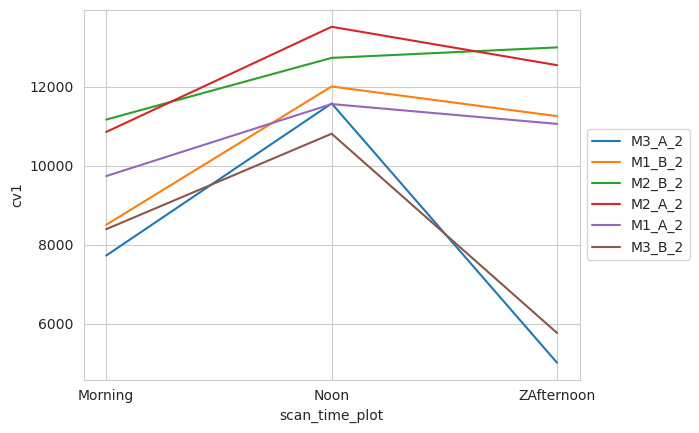

In [57]:
col = "cv1"
scan_side_method_med["method_side"] = scan_side_method_med["method"] + "_" + scan_side_method_med["side"] + "_" + scan_side_method_med["real_row"].apply(str)
scan_side_method_med["scan_time_plot"] = scan_side_method_med["scan_time"].apply(lambda x: x.replace("Afternoon", "ZAfternoon"))
scan_side_method_med.sort_values("scan_time_plot", inplace = True)
sns.lineplot(data=scan_side_method_med[scan_side_method_med["real_row"] == 2], x="scan_time_plot", y = col,
             hue = "method_side", palette="tab10")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
scan_side_method_med.drop(["method_side", "scan_time_plot"], axis = 1, inplace = True)


In [58]:
scan_side_method_med.sort_values("scan_time", inplace = True)

In [59]:
scan_side_method_med.groupby(["real_row", "side", "method"]).median().reset_index()[['cv1', 'cv1_per_meter']].round(0)

,cv1,cv1_per_meter
0,19090.0,128.0
1,19493.0,120.0
2,16726.0,102.0
3,17770.0,111.0
4,19041.0,118.0
5,15304.0,96.0
6,11063.0,152.0
7,12549.0,177.0
8,7730.0,105.0
9,11259.0,151.0


In [62]:
# numeric_col = scan_side_method_med.select_dtypes(include=['int', 'float']).columns.tolist()
diff_list = []
for real_row in scan_side_method_med["real_row"].unique():
    for side in scan_side_method_med["side"].unique():
        for method in scan_side_method_med["method"].unique():
            filterd_df = scan_side_method_med[(scan_side_method_med["side"] == side)&
                                             (scan_side_method_med["method"] == method)&
                                             (scan_side_method_med["real_row"]== real_row)]
            if len(filterd_df) < 3:
                continue
            row_vals = filterd_df.iloc[0,4:] - filterd_df.iloc[1,4:]
            row_vals = np.abs(row_vals)
            row_res = pd.concat([filterd_df.iloc[0,[0,2,3]], row_vals]).to_frame().T
            diff_list.append(row_res)
df_diff = pd.concat(diff_list).reset_index(drop = True)
df_diff.to_csv("/home/fruitspec-lab/Downloads/EXPOUSREEXP_diffs.csv")
df_diff[['real_row', 'side', 'method', 'cv1', 'cv1_per_meter']].sort_values(["real_row", "side", "method"])

,real_row,side,method,cv1,cv1_per_meter
0,1,A,M1,7498.0,45.061987
1,1,A,M2,8958.0,55.264943
2,1,A,M3,8036.0,51.351246
3,1,B,M1,4798.5,29.864542
4,1,B,M2,7843.0,50.043388
5,1,B,M3,1340.0,9.019391
6,2,A,M1,1321.0,17.511262
7,2,A,M2,1690.0,27.72389
8,2,A,M3,2713.0,38.053242
9,2,B,M1,2749.5,33.363868


In [63]:
# numeric_col = scan_side_method_med.select_dtypes(include=['int', 'float']).columns.tolist()
diff_list = []
for real_row in scan_side_method_med["real_row"].unique():
    for side in scan_side_method_med["side"].unique():
        for method in scan_side_method_med["method"].unique():
            filterd_df = scan_side_method_med[(scan_side_method_med["side"] == side)&
                                             (scan_side_method_med["method"] == method)&
                                             (scan_side_method_med["real_row"]== real_row)]
            if len(filterd_df) < 2:
                continue
            row_vals = np.max(filterd_df.iloc[:,4:]) - np.min(filterd_df.iloc[:,4:])
            row_vals = np.abs(row_vals)
            row_res = pd.concat([filterd_df.iloc[0,[0,2,3]], row_vals]).to_frame().T
            diff_list.append(row_res)
df_diff = pd.concat(diff_list).reset_index(drop = True)
df_diff.to_csv("/home/fruitspec-lab/Downloads/EXPOUSREEXP_range.csv")
df_diff[['real_row', 'side', 'method', 'cv1', 'cv1_per_meter']].sort_values(["real_row", "side", "method"])

,real_row,side,method,cv1,cv1_per_meter
0,1,A,M1,7498.0,45.061987
1,1,A,M2,8958.0,55.264943
2,1,A,M3,8036.0,51.351246
3,1,B,M1,7539.0,48.449318
4,1,B,M2,7843.0,50.043388
5,1,B,M3,1421.0,9.019391
6,2,A,M1,1823.0,23.735386
7,2,A,M2,2662.0,34.43489
8,2,A,M3,6564.0,89.129004
9,2,B,M1,3500.5,45.231282


In [64]:
# numeric_col = scan_side_method_med.select_dtypes(include=['int', 'float']).columns.tolist()
diff_list = []
for real_row in scan_side_method_med["real_row"].unique():
    for side in scan_side_method_med["side"].unique():
        for method in scan_side_method_med["method"].unique():
            filterd_df = scan_side_method_med[(scan_side_method_med["side"] == side)&
                                             (scan_side_method_med["method"] == method)&
                                             (scan_side_method_med["real_row"]== real_row)]
            if len(filterd_df) < 3:
                continue
            row_vals = filterd_df.iloc[:,4:].std()
            row_vals = np.abs(row_vals)
            row_res = pd.concat([filterd_df.iloc[0,[0,2,3]], row_vals]).to_frame().T
            diff_list.append(row_res)
df_diff = pd.concat(diff_list).reset_index(drop = True)
df_diff.to_csv("/home/fruitspec-lab/Downloads/EXPOUSREEXP_stds.csv")
df_diff[['real_row', 'side', 'method', 'cv1', 'cv1_per_meter']].sort_values(["real_row", "side", "method"])

,real_row,side,method,cv1,cv1_per_meter
0,1,A,M1,3861.269394,25.334264
1,1,A,M2,4755.563303,29.417203
2,1,A,M3,4582.942868,28.603398
3,1,B,M1,3816.02899,24.442521
4,1,B,M2,4010.043183,25.314048
5,1,B,M3,798.060357,5.1271
6,2,A,M1,941.662891,12.306858
7,2,A,M2,1347.041697,18.25474
8,2,A,M3,3298.400269,44.72278
9,2,B,M1,1842.880512,23.451553


In [22]:
df_out["full_name"] = df_out["name"].apply(lambda x: x.rsplit("_",1)[0])

In [23]:
cv_features = pd.read_csv('/media/fruitspec-lab/cam175/Aq_Test/cv_features.csv')
if "Unnamed: 0" in cv_features.columns:
    cv_features.drop(["Unnamed: 0"], inplace =True, axis = 1)
cv_features["full_name"] = cv_features["customer"] + "_" + cv_features["block_name"] + "_" + cv_features["name"].apply(lambda x: x.split("_")[0])
cv_features = cv_features.merge(df_out.set_index("full_name")[["real_row", "method", "side", "scan_time"]],on = "full_name")



In [24]:
scan_side_method_med = cv_features.groupby(["real_row","scan_time", "side", "method"]).median().reset_index()
scan_side_method_std = cv_features.groupby(["real_row","scan_time", "side", "method"]).std().reset_index()
display(scan_side_method_med)
# scan_side_method_med.to_csv("/home/fruitspec-lab/Downloads/OR2009_scan_meds.csv")
scan_side_method_std

,real_row,scan_time,side,method,cv1,cv2,cv3,cv4,cv5,percent_seen,percent_h_seen,percent_seen_top,no_tree_indicator,full_tree
0,1,Afternoon,A,M1,3054.0,1527.0,901.0,552.0,363.0,0.0,0.0,0.0,0.0,0.0
1,1,Afternoon,A,M2,2898.0,1681.0,1169.0,820.0,598.0,0.0,0.0,0.0,0.0,0.0
2,1,Afternoon,A,M3,2122.0,938.0,626.0,443.0,318.0,0.0,0.0,0.0,0.0,0.0
3,1,Afternoon,B,M1,3719.5,2111.0,1496.0,1109.0,822.0,0.0,0.0,0.0,0.0,0.0
4,1,Afternoon,B,M2,4690.0,2896.0,2111.0,1562.0,1189.0,0.0,0.0,0.0,0.0,0.0
5,1,Afternoon,B,M3,2912.0,1398.0,893.0,596.0,443.0,0.0,0.0,0.0,0.0,0.0
6,1,Morning,A,M1,4540.0,2565.0,1799.0,1337.0,1018.0,0.0,0.0,0.0,0.0,0.0
7,1,Morning,A,M2,4298.0,2484.0,1724.0,1249.0,900.0,0.0,0.0,0.0,0.0,0.0
8,1,Morning,A,M3,3445.0,1885.0,1243.0,862.0,600.0,0.0,0.0,0.0,0.0,0.0
9,1,Morning,B,M1,2969.0,1737.0,1318.0,1037.0,853.0,0.0,0.0,0.0,0.0,0.0


,real_row,scan_time,side,method,cv1,cv2,cv3,cv4,cv5,percent_seen,percent_h_seen,percent_seen_top,no_tree_indicator,full_tree
0,1,Afternoon,A,M1,787.629989,532.214243,353.590630,259.617668,198.746908,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,Afternoon,A,M2,123.005420,86.434947,42.335958,42.442117,47.721414,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,Afternoon,A,M3,518.707368,398.376706,254.657286,158.745079,109.974239,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,Afternoon,B,M1,1095.308404,982.878426,721.248917,545.886435,418.607214,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,Afternoon,B,M2,209.772099,171.913738,111.072049,46.003623,25.119713,0.000000,0.000000,0.000000,0.000000,0.000000
5,1,Afternoon,B,M3,1722.459927,1080.631852,799.393332,598.139365,449.600156,0.000000,0.000000,0.000000,0.000000,0.000000
6,1,Morning,A,M1,344.459480,206.403327,188.855324,191.115149,188.934733,0.000000,0.000000,0.000000,0.000000,0.000000
7,1,Morning,A,M2,173.620275,103.967944,95.660859,88.838805,77.311060,0.000000,0.000000,0.000000,0.000000,0.000000
8,1,Morning,A,M3,136.873421,115.768447,101.869197,80.523289,60.475891,0.000000,0.000000,0.000000,0.000000,0.000000
9,1,Morning,B,M1,320.485569,251.573051,217.356849,208.626460,198.924609,0.000000,0.000000,0.000000,0.000000,0.000000


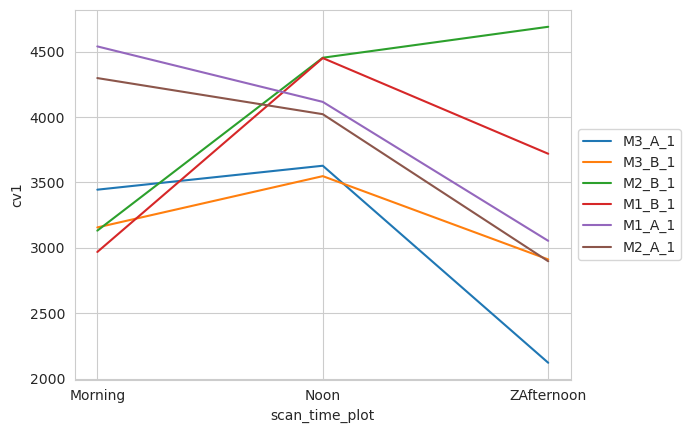

In [25]:
col = "cv1"
scan_side_method_med["method_side"] = scan_side_method_med["method"] + "_" + scan_side_method_med["side"] + "_" + scan_side_method_med["real_row"].apply(str)
scan_side_method_med["scan_time_plot"] = scan_side_method_med["scan_time"].apply(lambda x: x.replace("Afternoon", "ZAfternoon"))
scan_side_method_med.sort_values("scan_time_plot", inplace = True)
sns.lineplot(data=scan_side_method_med[scan_side_method_med["real_row"] == 1], x="scan_time_plot", y = col,
             hue = "method_side", palette="tab10")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
scan_side_method_med.drop(["method_side", "scan_time_plot"], axis = 1, inplace = True)
scan_side_method_med.sort_values("scan_time", inplace = True)


In [26]:
scan_side_method_med.groupby(["real_row", "side", "method"]).median().reset_index()[["real_row", "side", "method", 'cv1']].round(0)

,real_row,side,method,cv1
0,1,A,M1,4116.0
1,1,A,M2,4022.0
2,1,A,M3,3445.0
3,1,B,M1,3720.0
4,1,B,M2,4454.0
5,1,B,M3,3156.0
6,2,A,M1,4974.0
7,2,A,M2,6151.0
8,2,A,M3,3710.0
9,2,B,M1,5912.0


In [27]:
# numeric_col = scan_side_method_med.select_dtypes(include=['int', 'float']).columns.tolist()
diff_list = []
for real_row in scan_side_method_med["real_row"].unique():
    for side in scan_side_method_med["side"].unique():
        for method in scan_side_method_med["method"].unique():
            filterd_df = scan_side_method_med[(scan_side_method_med["side"] == side)&
                                             (scan_side_method_med["method"] == method)&
                                             (scan_side_method_med["real_row"]== real_row)]
            if len(filterd_df) < 2:
                continue
            row_vals = filterd_df.iloc[0,4:] - filterd_df.iloc[1,4:]
            row_vals = np.abs(row_vals)
            row_res = pd.concat([filterd_df.iloc[0,[0,2,3]], row_vals]).to_frame().T
            diff_list.append(row_res)
df_diff = pd.concat(diff_list).reset_index(drop = True)
df_diff.to_csv("/home/fruitspec-lab/Downloads/EXPOUSREEXP_diffs.csv")
df_diff[['real_row', 'side', 'method', 'cv1']]

,real_row,side,method,cv1
0,1,A,M1,1486.0
1,1,A,M2,1400.0
2,1,A,M3,1323.0
3,1,B,M1,750.5
4,1,B,M2,1558.0
5,1,B,M3,244.5
6,2,A,M1,584.0
7,2,A,M2,1236.0
8,2,A,M3,855.0
9,2,B,M1,1971.0


In [28]:
# numeric_col = scan_side_method_med.select_dtypes(include=['int', 'float']).columns.tolist()
diff_list = []
for real_row in scan_side_method_med["real_row"].unique():
    for side in scan_side_method_med["side"].unique():
        for method in scan_side_method_med["method"].unique():
            filterd_df = scan_side_method_med[(scan_side_method_med["side"] == side)&
                                             (scan_side_method_med["method"] == method)&
                                             (scan_side_method_med["real_row"]== real_row)]
            if len(filterd_df) < 2:
                continue
            row_vals = np.max(filterd_df.iloc[:,4:]) - np.min(filterd_df.iloc[:,4:])
            row_vals = np.abs(row_vals)
            row_res = pd.concat([filterd_df.iloc[0,[0,2,3]], row_vals]).to_frame().T
            diff_list.append(row_res)
df_diff = pd.concat(diff_list).reset_index(drop = True)
df_diff.to_csv("/home/fruitspec-lab/Downloads/EXPOUSREEXP_range.csv")
df_diff[['real_row', 'side', 'method', 'cv1']]


,real_row,side,method,cv1
0,1,A,M1,1486.0
1,1,A,M2,1400.0
2,1,A,M3,1506.0
3,1,B,M1,1482.0
4,1,B,M2,1558.0
5,1,B,M3,636.5
6,2,A,M1,1278.0
7,2,A,M2,1419.5
8,2,A,M3,1783.0
9,2,B,M1,2380.0


In [29]:
# numeric_col = scan_side_method_med.select_dtypes(include=['int', 'float']).columns.tolist()
diff_list = []
for real_row in scan_side_method_med["real_row"].unique():
    for side in scan_side_method_med["side"].unique():
        for method in scan_side_method_med["method"].unique():
            filterd_df = scan_side_method_med[(scan_side_method_med["side"] == side)&
                                             (scan_side_method_med["method"] == method)&
                                             (scan_side_method_med["real_row"]== real_row)]
            if len(filterd_df) < 3:
                continue
            row_vals = filterd_df.iloc[:,4:].std()
            row_vals = np.abs(row_vals)
            row_res = pd.concat([filterd_df.iloc[0,[0,2,3]], row_vals]).to_frame().T
            diff_list.append(row_res)
df_diff = pd.concat(diff_list).reset_index(drop = True)
df_diff.to_csv("/home/fruitspec-lab/Downloads/EXPOUSREEXP_stds.csv")
df_diff[['real_row', 'side', 'method', 'cv1']]

,real_row,side,method,cv1
0,1,A,M1,765.486338
1,1,A,M2,741.569507
2,1,A,M3,821.771866
3,1,B,M1,741.020299
4,1,B,M2,839.608887
5,1,B,M3,321.085788
6,2,A,M1,639.788507
7,2,A,M2,772.04798
8,2,A,M3,891.74903
9,2,B,M1,1272.564471


# CV sunside analysis after slicing

In [30]:
or2009_cv_features = "/media/fruitspec-lab/cam175/customers_new/MOTCHA/OR2009/cv_features.csv"
BEERAMU0_cv_features = "/media/fruitspec-lab/cam175/customers_new/MOTCHA/BEERAMU0/cv_features.csv"
ORSHICHT_cv_features = "/media/fruitspec-lab/cam175/customers_new/MOTCHA/ORSCHIST/cv_features.csv"
cv_features_paths = [or2009_cv_features, BEERAMU0_cv_features, ORSHICHT_cv_features]
cv_df = pd.concat([pd.read_csv(p) for p in cv_features_paths])

In [31]:
cv_df["row"] = cv_df["block_name"] + "_" + cv_df["name"].apply(lambda x: x.split("_")[0])
value_counts = cv_df['row'].value_counts()
valid_row = list(value_counts[value_counts==1].index)
valid_trees = (cv_df["name"][cv_df["name"].str.contains("T11")]).values
cv_df_valid = cv_df[np.isin(cv_df["row"], valid_row) | np.isin(cv_df["name"], valid_trees)]

In [48]:
df_out["row"] = df_out["block"] + "_R" + df_out["counter_row"].apply(str)

In [50]:
cv_df_valid = cv_df_valid.merge(df_out.set_index("row").drop("counter_row", axis = 1), on = "row")

In [51]:
cv_df_valid["block_real_row"] = cv_df_valid["block_name"] + "_R" + cv_df_valid["real_row"].apply(str)

KeyError: 'real_row'

In [ ]:
cv_df_valid[["cv1", "real_row", "sunside", "block_name", "row"]].sort_values(["real_row", "sunside"])

In [ ]:
grp_res_cv = cv_df_valid.groupby(["real_row", "sunside", "block_name"]).median().reset_index()
grp_res_cv["block_real_row"] = grp_res_cv["block_name"] + "_R" + grp_res_cv["real_row"].apply(str)
grp_res_cv = grp_res_cv.sort_values(["block_name","sunside"])

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(data = grp_res_cv, x = "sunside", y= "cv1", hue = "block_real_row")
plt.show()

In [ ]:
dfs_list = []
for real_row in grp_res_cv["real_row"].unique():
    real_row_subdf = grp_res_cv[grp_res_cv["real_row"] == real_row]
    if not "side" in real_row_subdf["sunside"].iloc[0]:
        real_row_subdf = grp_res_cv[grp_res_cv["real_row"] == real_row]
        front_cv = real_row_subdf[real_row_subdf["sunside"] == "front"].reset_index(drop=True)[[f"cv{i}" for i in range(1,6)]]                                                                            
        noon_cv = real_row_subdf[real_row_subdf["sunside"] == "noon"].reset_index(drop=True)[[f"cv{i}" for i in range(1,6)]]
        rear_cv = real_row_subdf[real_row_subdf["sunside"] == "rear"].reset_index(drop=True)[[f"cv{i}" for i in range(1,6)]]
        ratios_df = pd.concat([front_cv/noon_cv, rear_cv/noon_cv])
        ratios_df["real_row"] = real_row
        ratios_df["sunside"] = ["front", "rear"]
        dfs_list.append(ratios_df)
factor_ratios = pd.concat(dfs_list)


In [ ]:
1/factor_ratios[np.isin(factor_ratios["real_row"], [1,2])].groupby("sunside").mean()

In [ ]:
factor_ratios.groupby("sunside").median()

# F_modeling

### Load data

In [ ]:
features_df = cv_df.copy()
f_df = pd.read_csv("/media/fruitspec-lab/cam175/F_dfs/MEHADRINEXP_F.csv")


In [ ]:
features_df["full_name"] = features_df["block_name"] + "_" + features_df["name"]
f_df["full_name"] = f_df["block_name"] + "_" + f_df["new_tree_name"]

In [ ]:
features_df["real_row"] = features_df["row"].map(dict(zip(df_real_row["row"],
                                                              df_real_row["Block_name_row_tags"] +
                                                          "_R" + df_real_row["real_row"].apply(str))))
features_df["sunside"] = features_df["row"].map(dict(zip(df_real_row["row"], df_real_row["sunside"])))
features_df["side"] = features_df["row"].map(dict(zip(df_real_row["row"], df_real_row["side"])))

In [ ]:
# merge F on name
df_f_org = features_df
df_f_org["F"] = features_df["full_name"].map(dict(zip(f_df["full_name"], f_df["F"])))

In [ ]:
rows_F = df_f_org.groupby("real_row")["F"].sum()/2
cv_df_valid["F"] = cv_df_valid["block_real_row"].map(dict(rows_F))
cv_df_valid["factor"] = cv_df_valid["F"]/cv_df_valid["cv1"]

In [ ]:
df_f_org = df_f_org[~df_f_org["F"].isna()].reset_index(drop = True)

In [ ]:
df_f_org[[f"cv{i}" for i in range(1,6)] + 
         ["F", "name", "block_name"]].to_csv("/media/fruitspec-lab/cam175/MEHADRINEXP/MEHADRINEXP_cv_and_F.csv")


In [ ]:
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    df_f_org[cv_F_col] = df_f_org[cv_col]/df_f_org["F"]

In [ ]:
# df_f_org.to_csv(f"{df_f_path.split('.')[0]}_cvf.csv")

### Short EDA

In [ ]:
df_f_org[df_f_org["side"] == "B"][cv_F_cols].mean().round(2)

In [ ]:
df_f_org.groupby(["block_name"])[cv_F_cols].mean().round(2)

In [ ]:
df_f = df_f_org.copy()

### CV-F graphs

In [ ]:
plot_F_cv(df_f_org, "1", title = "F ~ CV", add_xy_line=False)

In [ ]:
for i in range(1,6):
    plot_F_cv(df_f,i,"block_name", f"samp{i}")

In [ ]:
for i in range(1,6):
    plot_F_cv(df_f,i,"side", f"samp{i}")

### Modeling

In [ ]:
import sys
sys.path.append(r'/home/fruitspec-lab/FruitSpec/Code/roi/fsCounter')

In [ ]:
df_f["row"] = df_f["real_row"]

df = df_f.reset_index(drop = True).copy()
X = df[["cv1"]]
y = df["F"]
model = LinearRegression(fit_intercept = False)
print(cross_validate_with_mean(model, X, y, groups=df["row"]))
print(cross_validate_with_mean(model, X, y, groups=df["block_name"]))
model.fit(X,y)
print(model.intercept_, model.coef_)

In [ ]:
run_LROCV_by_block(df_f, "cv1")

In [ ]:
run_LROCV_by_block(df_f, "cv1")

In [ ]:
run_LROCV_by_block(df_f, "cv1", fit_intercept=True)

# 2 sided test

In [ ]:
# f_df_serinal["base_tree_name"] = base_tree_name
# f_df_serinal["tree_new_name"] = tree_new_name
# features_df[features_df["customer"].isin(["FOWLER", "MOTCHA"])]["full_name"]
# features_df.loc[:, "name"] = features_df["full_name"].map(dict(zip(f_df_serinal["full_name"],
#                                                                    f_df_serinal["tree_new_name"])))
# features_df["side"] = features_df["full_name"].map(dict(zip(f_df_serinal["full_name"],
#                                                                    f_df_serinal["side"])))

In [ ]:
features_df["full_name"] = features_df["block_name"] + "_" + features_df["name"]
f_df["full_name"] = f_df["block_name"] + "_" + f_df["new_tree_name"]
f_df_serinal = f_df[~f_df["tree_serial"].isna()]
f_df_serinal["side"].replace({"A":1, "B":2}, inplace=True)

f_df_serinal["real_row"] = f_df_serinal["full_name"].map(dict(zip(features_df["full_name"],
                                      features_df["real_row"])))
f_df_serinal["real_row"].fillna("OR2009_R1", inplace = True)

base_tree_name = f_df_serinal["real_row"] + "_T" + f_df_serinal["tree_serial"].astype(int).astype(str)
tree_new_name = base_tree_name + "_S" + f_df_serinal["side"].replace({"A":1, "B":2}).astype(int).astype(str)
tree_new_name = tree_new_name.apply(lambda x: f'{x.split("_")[1]}_{x.split("_")[3]}_{x.split("_")[2]}')
f_df_serinal["base_tree_name"] = base_tree_name
f_df_serinal["tree_new_name"] = tree_new_name
features_df[features_df["customer"].isin(["FOWLER", "MOTCHA"])]["full_name"]
features_df.loc[:, "name"] = features_df["full_name"].map(dict(zip(f_df_serinal["full_name"],
                                                                   f_df_serinal["tree_new_name"])))
features_df["side"] = features_df["full_name"].map(dict(zip(f_df_serinal["full_name"],
                                                                   f_df_serinal["side"])))

In [ ]:
df_f = features_df[~features_df["F"].isna()].copy().reset_index(drop=True)
cv_cols = ["cv1", "cv2", "cv3", "cv4" ,"cv5"]

df_f["base_tree_name"] = df_f["block_name"] + "_"  + df_f["name"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[-1])
counts = df_f["base_tree_name"].value_counts()>1
df_f = df_f[df_f["base_tree_name"].map(dict(zip(counts.index, counts.values)))]


In [ ]:
grouped_trees = df_f.groupby("base_tree_name")[cv_cols + ["F"]].mean()
grouped_trees[cv_cols] = grouped_trees[cv_cols]*2
grouped_trees["base_tree_name"] = list(grouped_trees.index)
grouped_trees["block_name"] = grouped_trees["base_tree_name"].apply(lambda x: x.split("_")[0])

In [ ]:
cv_cols = [f"cv{i}" for i in range(1,6)]
cv_F_cols = [f"{col}/F" for col in cv_cols]
for cv_col, cv_F_col in zip(cv_cols, cv_F_cols):
    grouped_trees[cv_F_col] = grouped_trees[cv_col]/grouped_trees["F"]
grouped_trees.groupby("block_name")[cv_F_cols].mean().round(2)

In [ ]:
grouped_trees["real_row"] = grouped_trees["base_tree_name"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[1])

In [ ]:
operational_rows = {"1_1": "R1", 
                   "1_2": "R2", 
                   "2_1": "R2", 
                   "2_2": "R1", 
                   "3_1": "R3", 
                   "3_2": "R4", 
                   "4_1": "R4", 
                   "4_2": "R3", 
                   "5_1": "R5", 
                   "5_2": "R6", 
                   "6_1": "R6", 
                   "6_2": "R5"}
df_f["operational_rows"] = df_f["real_row"].apply(lambda x: x.split("_")[1][1:]) + "_" + df_f["side"].apply(int).apply(str)
df_f["operational_rows"] = df_f["operational_rows"].map(operational_rows)


In [ ]:
results_list = []
include_fruits = False
include_interaction=False
for cv in range(1,6):
    # 2 sided
    df = grouped_trees.reset_index(drop=True).copy()
    gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
    lro_res, lro_std, _, _, _ = get_model_res(df, cv, include_fruits, include_interaction, "real_row")
    res = {"model": "2_sided", "cv": cv,
           "LBOCV": gr_res, "LBOCV_std": ge_std, "LROCV": lro_res, "LROCV_std": lro_std,
           "tree_mape": tree_res, "tree_std": tree_std}
    results_list.append(res)

    df = df_f.reset_index(drop=True)
    gr_res, ge_std, tree_res, tree_std, oper_preds = get_model_res(df, cv, include_fruits, include_interaction)
    lro_res, lro_std, _, _, _ = get_model_res(df, cv, include_fruits, include_interaction, "operational_rows")
    df["oper_preds"] = oper_preds
    grpd_res = df.groupby(["block_name","operational_rows"])["F", "oper_preds"].sum().reset_index()
    gr_res = np.mean((abs(grpd_res["F"]-grpd_res["oper_preds"])/grpd_res["F"]))
    ge_std = np.std(abs(grpd_res["F"]-grpd_res["oper_preds"])/grpd_res["F"])
    res = {"model": "opertional", "cv": cv,
           "LBOCV": gr_res, "LBOCV_std": ge_std, "LROCV": lro_res, "LROCV_std": lro_std,
           "tree_mape": tree_res, "tree_std": tree_std}
    results_list.append(res)
    # 1 side 2 trees
#             df = df_f.reset_index(drop=True).copy()
#             gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
#             lro_res, lro_std, _, _, _ = get_model_res(df, cv, include_fruits, include_interaction, "real_row")
#             res = {"model": "1_sided", "cv": cv,
#                    "LBOCV": gr_res, "LBOCV_std": ge_std, "LROCV": lro_res, "LROCV_std": lro_std, "tree_mape": tree_res, "tree_std": tree_std,
#                   "include_fruits": include_fruits, "include_interaction": include_interaction}
#             results_list.append(res)

    #side A only
#     df = df_f[df_f["side"] == 1].reset_index(drop=True).copy()
#     gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
#     lro_res, lro_std, _, _, _ = get_model_res(df, cv, include_fruits, include_interaction, "real_row")
#     res = {"model": "A", "cv": cv,
#            "LBOCV": gr_res, "LBOCV_std": ge_std, "LROCV": lro_res, "LROCV_std": lro_std,
#            "tree_mape": tree_res, "tree_std": tree_std}
#     results_list.append(res)

    #side B only
#     df = df_f[df_f["side"] == 2].reset_index(drop=True).copy()
#     gr_res, ge_std, tree_res, tree_std, preds = get_model_res(df, cv, include_fruits, include_interaction)
#     lro_res, lro_std, _, _, _ = get_model_res(df, cv, include_fruits, include_interaction, "real_row")
#     res = {"model": "B", "cv": cv,
#            "LBOCV": gr_res, "LBOCV_std": ge_std, "LROCV": lro_res, "LROCV_std": lro_std,
#            "tree_mape": tree_res, "tree_std": tree_std}
#     results_list.append(res)
                        
summary_res = pd.DataFrame(results_list)   
summary_res.round(3)